In [165]:
# Load libraries
import numpy as np
import pandas as pd
import pandas_datareader.data as web
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor

#Libraries for Deep Learning Models
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.layers import LSTM
from keras.wrappers.scikit_learn import KerasRegressor

#Libraries for Statistical Models
import statsmodels.api as sm

#Libraries for Saving the Model
from pickle import dump
from pickle import load

# Time series Models
from statsmodels.tsa.arima_model import ARIMA
#from statsmodels.tsa.statespace.sarimax import SARIMAX

# Error Metrics
from sklearn.metrics import mean_squared_error

# Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression


#Plotting 
from pandas.plotting import scatter_matrix
from statsmodels.graphics.tsaplots import plot_acf


In [166]:
coins = ['BTC-USD','ETH-USD', 'DOGE-USD']
coins_data = web.DataReader(coins, 'yahoo')

In [167]:
coins_data

Attributes     Adj Close                                Close               \
Symbols          BTC-USD      ETH-USD  DOGE-USD       BTC-USD      ETH-USD   
Date                                                                         
2016-06-29    673.336975    12.461500  0.000304    673.336975    12.461500   
2016-06-30    676.296021    12.199500  0.000302    676.296021    12.199500   
2016-07-01    703.702026    12.128400  0.000306    703.702026    12.128400   
2016-07-02    658.664001    11.720200  0.000282    658.664001    11.720200   
2016-07-03    683.661987    11.471000  0.000289    683.661987    11.471000   
...                  ...          ...       ...           ...          ...   
2021-06-24  31637.779297  1813.217285  0.239153  31637.779297  1813.217285   
2021-06-25  32186.277344  1829.239258  0.244784  32186.277344  1829.239258   
2021-06-26  34649.644531  1978.894653  0.264450  34649.644531  1978.894653   
2021-06-27  34434.335938  2079.657471  0.256857  34434.335938  2079.657471   
2021-06-30  35957.378906  2178.660156  0.261819  35957.378906  2178.660156   

Attributes                    High                                  Low  \
Symbols     DOGE-USD       BTC-USD      ETH-USD  DOGE-USD       BTC-USD   
Date                                                                      
2016-06-29  0.000304    675.403015    12.741900  0.000306    636.607971   
2016-06-30  0.000302    686.153992    12.491300  0.000309    669.593994   
2016-07-01  0.000306    703.702026    12.220900  0.000306    676.398987   
2016-07-02  0.000282    704.968018    12.145200  0.000307    649.008972   
2016-07-03  0.000289    683.661987    11.880200  0.000292    650.507996   
...              ...           ...          ...       ...           ...   
2021-06-24  0.239153  35487.246094  2017.759521  0.289145  31350.884766   
2021-06-25  0.244784  32637.587891  1850.179810  0.255127  30184.501953   
2021-06-26  0.264450  34656.128906  1979.958130  0.266891  32071.757812   
2021-06-27  0.256857  35219.890625  2139.805420  0.266982  33902.074219   
2021-06-30  0.261819  36074.757812  2182.802734  0.262135  35741.589844   

Attributes                                 Open                         \
Symbols         ETH-USD  DOGE-USD       BTC-USD      ETH-USD  DOGE-USD   
Date                                                                     
2016-06-29    12.253600  0.000290    640.591003    12.602900  0.000295   
2016-06-30    11.733500  0.000297    672.515015    12.438100  0.000304   
2016-07-01    11.950200  0.000298    676.734009    12.216000  0.000302   
2016-07-02    11.589100  0.000277    704.968018    12.120800  0.000306   
2016-07-03    11.389500  0.000280    658.804016    11.696100  0.000284   
...                 ...       ...           ...          ...       ...   
2021-06-24  1794.400391  0.230006  34659.105469  1989.215820  0.263480   
2021-06-25  1719.559448  0.230972  31594.664062  1810.884277  0.237673   
2021-06-26  1811.245850  0.240894  32287.523438  1830.996948  0.246045   
2021-06-27  1963.615479  0.250762  34679.121094  1981.386475  0.264918   
2021-06-30  2149.665283  0.258155  35852.679688  2160.036621  0.261759   

Attributes        Volume                              
Symbols          BTC-USD       ETH-USD      DOGE-USD  
Date                                                  
2016-06-29  1.389800e+08  1.580130e+07  3.599160e+05  
2016-06-30  1.344310e+08  1.723650e+07  2.703600e+05  
2016-07-01  1.123540e+08  8.987070e+06  1.594450e+05  
2016-07-02  1.295120e+08  1.058870e+07  4.726270e+05  
2016-07-03  9.200840e+07  1.294350e+07  1.817510e+05  
...                  ...           ...           ...  
2021-06-24  4.023090e+10  2.277433e+10  5.542163e+09  
2021-06-25  3.858539e+10  2.063754e+10  2.649457e+09  
2021-06-26  3.551164e+10  1.988547e+10  2.167522e+09  
2021-06-27  3.389252e+10  2.551460e+10  1.932995e+09  
2021-06-30  3.790636e+10  2.502286e+10  2.234540e+09  

[1822 rows x 18 columns]

In [168]:
coins_data.drop_duplicates()

Attributes     Adj Close                                Close               \
Symbols          BTC-USD      ETH-USD  DOGE-USD       BTC-USD      ETH-USD   
Date                                                                         
2016-06-29    673.336975    12.461500  0.000304    673.336975    12.461500   
2016-06-30    676.296021    12.199500  0.000302    676.296021    12.199500   
2016-07-01    703.702026    12.128400  0.000306    703.702026    12.128400   
2016-07-02    658.664001    11.720200  0.000282    658.664001    11.720200   
2016-07-03    683.661987    11.471000  0.000289    683.661987    11.471000   
...                  ...          ...       ...           ...          ...   
2021-06-24  31637.779297  1813.217285  0.239153  31637.779297  1813.217285   
2021-06-25  32186.277344  1829.239258  0.244784  32186.277344  1829.239258   
2021-06-26  34649.644531  1978.894653  0.264450  34649.644531  1978.894653   
2021-06-27  34434.335938  2079.657471  0.256857  34434.335938  2079.657471   
2021-06-30  35957.378906  2178.660156  0.261819  35957.378906  2178.660156   

Attributes                    High                                  Low  \
Symbols     DOGE-USD       BTC-USD      ETH-USD  DOGE-USD       BTC-USD   
Date                                                                      
2016-06-29  0.000304    675.403015    12.741900  0.000306    636.607971   
2016-06-30  0.000302    686.153992    12.491300  0.000309    669.593994   
2016-07-01  0.000306    703.702026    12.220900  0.000306    676.398987   
2016-07-02  0.000282    704.968018    12.145200  0.000307    649.008972   
2016-07-03  0.000289    683.661987    11.880200  0.000292    650.507996   
...              ...           ...          ...       ...           ...   
2021-06-24  0.239153  35487.246094  2017.759521  0.289145  31350.884766   
2021-06-25  0.244784  32637.587891  1850.179810  0.255127  30184.501953   
2021-06-26  0.264450  34656.128906  1979.958130  0.266891  32071.757812   
2021-06-27  0.256857  35219.890625  2139.805420  0.266982  33902.074219   
2021-06-30  0.261819  36074.757812  2182.802734  0.262135  35741.589844   

Attributes                                 Open                         \
Symbols         ETH-USD  DOGE-USD       BTC-USD      ETH-USD  DOGE-USD   
Date                                                                     
2016-06-29    12.253600  0.000290    640.591003    12.602900  0.000295   
2016-06-30    11.733500  0.000297    672.515015    12.438100  0.000304   
2016-07-01    11.950200  0.000298    676.734009    12.216000  0.000302   
2016-07-02    11.589100  0.000277    704.968018    12.120800  0.000306   
2016-07-03    11.389500  0.000280    658.804016    11.696100  0.000284   
...                 ...       ...           ...          ...       ...   
2021-06-24  1794.400391  0.230006  34659.105469  1989.215820  0.263480   
2021-06-25  1719.559448  0.230972  31594.664062  1810.884277  0.237673   
2021-06-26  1811.245850  0.240894  32287.523438  1830.996948  0.246045   
2021-06-27  1963.615479  0.250762  34679.121094  1981.386475  0.264918   
2021-06-30  2149.665283  0.258155  35852.679688  2160.036621  0.261759   

Attributes        Volume                              
Symbols          BTC-USD       ETH-USD      DOGE-USD  
Date                                                  
2016-06-29  1.389800e+08  1.580130e+07  3.599160e+05  
2016-06-30  1.344310e+08  1.723650e+07  2.703600e+05  
2016-07-01  1.123540e+08  8.987070e+06  1.594450e+05  
2016-07-02  1.295120e+08  1.058870e+07  4.726270e+05  
2016-07-03  9.200840e+07  1.294350e+07  1.817510e+05  
...                  ...           ...           ...  
2021-06-24  4.023090e+10  2.277433e+10  5.542163e+09  
2021-06-25  3.858539e+10  2.063754e+10  2.649457e+09  
2021-06-26  3.551164e+10  1.988547e+10  2.167522e+09  
2021-06-27  3.389252e+10  2.551460e+10  1.932995e+09  
2021-06-30  3.790636e+10  2.502286e+10  2.234540e+09  

[1822 rows x 18 columns]

In [169]:
return_period = 5

In [170]:
Y = np.log(coins_data.loc[:, ('Adj Close', 'BTC-USD')]).diff(return_period).shift(-return_period)
Y

Date
2016-06-29   -0.004033
2016-06-30    0.001529
2016-07-01   -0.094009
2016-07-02    0.011861
2016-07-03   -0.049015
                ...   
2021-06-24         NaN
2021-06-25         NaN
2021-06-26         NaN
2021-06-27         NaN
2021-06-30         NaN
Name: (Adj Close, BTC-USD), Length: 1822, dtype: float64

In [171]:
Y.name = Y.name[-1]+'_pred'

In [172]:
Y.name

'BTC-USD_pred'

In [173]:
X1 = np.log(coins_data.loc[:, ('Adj Close', ('ETH-USD','DOGE-USD'))]).diff(return_period)
X1

Attributes Adj Close          
Symbols      ETH-USD  DOGE-USD
Date                          
2016-06-29       NaN       NaN
2016-06-30       NaN       NaN
2016-07-01       NaN       NaN
2016-07-02       NaN       NaN
2016-07-03       NaN       NaN
...              ...       ...
2021-06-24 -0.214210 -0.160895
2021-06-25 -0.031855  0.314718
2021-06-26  0.053956  0.325217
2021-06-27  0.044201  0.101032
2021-06-30  0.091351 -0.003673

[1822 rows x 2 columns]

In [174]:
X1.columns = X1.columns.droplevel()


In [175]:
X1

Symbols,ETH-USD,DOGE-USD
Date,,
2016-06-29,NaN,NaN
2016-06-30,NaN,NaN
2016-07-01,NaN,NaN
2016-07-02,NaN,NaN
2016-07-03,NaN,NaN
...,...,...
2021-06-24,-0.214210,-0.160895
2021-06-25,-0.031855,0.314718
2021-06-26,0.053956,0.325217


In [176]:
X2 = pd.concat([np.log(bitcoin.loc[:, ('Adj Close', 'BTC-USD')]).diff(i) for i in [return_period, return_period*3, return_period*6, return_period*12]], axis=1).dropna()

In [177]:
X2

Adj Close                              
             BTC-USD   BTC-USD   BTC-USD   BTC-USD
Date                                              
2016-08-28 -0.010526  0.006350 -0.131891 -0.159430
2016-08-29 -0.000447  0.017931 -0.078528 -0.157917
2016-08-30 -0.007236 -0.003412 -0.052138 -0.201164
2016-08-31  0.004125 -0.001594  0.044370 -0.140545
2016-09-01  0.002827  0.002120  0.016082 -0.172160
...              ...       ...       ...       ...
2021-06-24 -0.120751 -0.148496 -0.216725 -0.535035
2021-06-25  0.015959 -0.148375 -0.177480 -0.536395
2021-06-26  0.063873 -0.025723 -0.029796 -0.458853
2021-06-27  0.020873 -0.127014 -0.005264 -0.441657
2021-06-30  0.039024 -0.109645  0.010143 -0.471445

[1762 rows x 4 columns]

In [178]:
X2.columns = ['BTC_DT', 'BTC_3DT', 'BTC_6DT', 'BTC_12DT']
X2

,BTC_DT,BTC_3DT,BTC_6DT,BTC_12DT
Date,,,,
2016-08-28,-0.010526,0.006350,-0.131891,-0.159430
2016-08-29,-0.000447,0.017931,-0.078528,-0.157917
2016-08-30,-0.007236,-0.003412,-0.052138,-0.201164
2016-08-31,0.004125,-0.001594,0.044370,-0.140545
2016-09-01,0.002827,0.002120,0.016082,-0.172160
...,...,...,...,...
2021-06-24,-0.120751,-0.148496,-0.216725,-0.535035
2021-06-25,0.015959,-0.148375,-0.177480,-0.536395
2021-06-26,0.063873,-0.025723,-0.029796,-0.458853


In [179]:
X1

Symbols,ETH-USD,DOGE-USD
Date,,
2016-06-29,NaN,NaN
2016-06-30,NaN,NaN
2016-07-01,NaN,NaN
2016-07-02,NaN,NaN
2016-07-03,NaN,NaN
...,...,...
2021-06-24,-0.214210,-0.160895
2021-06-25,-0.031855,0.314718
2021-06-26,0.053956,0.325217


In [180]:
X2

,BTC_DT,BTC_3DT,BTC_6DT,BTC_12DT
Date,,,,
2016-08-28,-0.010526,0.006350,-0.131891,-0.159430
2016-08-29,-0.000447,0.017931,-0.078528,-0.157917
2016-08-30,-0.007236,-0.003412,-0.052138,-0.201164
2016-08-31,0.004125,-0.001594,0.044370,-0.140545
2016-09-01,0.002827,0.002120,0.016082,-0.172160
...,...,...,...,...
2021-06-24,-0.120751,-0.148496,-0.216725,-0.535035
2021-06-25,0.015959,-0.148375,-0.177480,-0.536395
2021-06-26,0.063873,-0.025723,-0.029796,-0.458853


In [190]:
X1 = X1.join(X2)
# X = pd.concat([X1, X2], axis=1)

In [191]:
# X1.reset_index(drop=True, inplace=True)
X1

,ETH-USD,DOGE-USD,BTC_DT,BTC_3DT,BTC_6DT,BTC_12DT
Date,,,,,,
2016-06-29,NaN,NaN,NaN,NaN,NaN,NaN
2016-06-30,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-01,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-02,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-03,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2021-06-24,-0.214210,-0.160895,-0.120751,-0.148496,-0.216725,-0.535035
2021-06-25,-0.031855,0.314718,0.015959,-0.148375,-0.177480,-0.536395
2021-06-26,0.053956,0.325217,0.063873,-0.025723,-0.029796,-0.458853


In [184]:
# X1

In [185]:
# X2

In [139]:
# X = pd.concat([X1, X2], axis=1)

In [140]:
# X

,ETH-USD,DOGE-USD,BTC_DT,BTC_3DT,BTC_6DT,BTC_12DT
0,NaN,NaN,-0.010526,0.006350,-0.131891,-0.159430
1,NaN,NaN,-0.000447,0.017931,-0.078528,-0.157917
2,NaN,NaN,-0.007236,-0.003412,-0.052138,-0.201164
3,NaN,NaN,0.004125,-0.001594,0.044370,-0.140545
4,NaN,NaN,0.002827,0.002120,0.016082,-0.172160
...,...,...,...,...,...,...
1817,-0.214210,-0.160895,NaN,NaN,NaN,NaN
1818,-0.031855,0.314718,NaN,NaN,NaN,NaN
1819,0.053956,0.325217,NaN,NaN,NaN,NaN
1820,0.044201,0.101032,NaN,NaN,NaN,NaN


In [192]:
# Y.reset_index(drop=True, inplace=True)
dataset = X1.join(Y).dropna().iloc[::return_period, :]
# dataset = pd.concat([Y, X], axis=1).dropna().iloc[::return_period, :]

In [193]:
dataset

,ETH-USD,DOGE-USD,BTC_DT,BTC_3DT,BTC_6DT,BTC_12DT,BTC-USD_pred
Date,,,,,,,
2016-08-28,-0.004741,-0.026317,-0.010526,0.006350,-0.131891,-0.159430,0.041129
2016-09-02,0.068172,0.047731,0.041129,0.038480,0.033871,-0.114268,0.045910
2016-09-07,-0.035737,-0.034486,0.045910,0.076513,0.063467,-0.036132,-0.027641
2016-09-12,0.049252,-0.013245,-0.027641,0.059398,0.065748,-0.084946,0.001038
2016-09-17,0.042101,0.064539,0.001038,0.019307,0.057787,-0.087564,-0.011597
...,...,...,...,...,...,...,...
2021-06-02,0.225154,0.277276,0.124582,0.057916,-0.307665,-0.404536,-0.158172
2021-06-07,-0.125874,-0.199313,-0.158172,-0.145266,-0.553712,-0.553930,0.155340
2021-06-12,-0.003600,-0.010137,0.155340,0.121750,-0.243563,-0.478807,-0.088476


In [196]:
dataset.head()

,ETH-USD,DOGE-USD,BTC_DT,BTC_3DT,BTC_6DT,BTC_12DT,BTC-USD_pred
Date,,,,,,,
2016-08-28,-0.004741,-0.026317,-0.010526,0.006350,-0.131891,-0.159430,0.041129
2016-09-02,0.068172,0.047731,0.041129,0.038480,0.033871,-0.114268,0.045910
2016-09-07,-0.035737,-0.034486,0.045910,0.076513,0.063467,-0.036132,-0.027641
2016-09-12,0.049252,-0.013245,-0.027641,0.059398,0.065748,-0.084946,0.001038
2016-09-17,0.042101,0.064539,0.001038,0.019307,0.057787,-0.087564,-0.011597


In [197]:
Y = dataset.loc[:, Y.name]
Y

Date
2016-08-28    0.041129
2016-09-02    0.045910
2016-09-07   -0.027641
2016-09-12    0.001038
2016-09-17   -0.011597
                ...   
2021-06-02   -0.158172
2021-06-07    0.155340
2021-06-12   -0.088476
2021-06-17   -0.059411
2021-06-22    0.020873
Name: BTC-USD_pred, Length: 358, dtype: float64

In [198]:
X = dataset.loc[:, X.columns]
X

,ETH-USD,DOGE-USD,BTC_DT,BTC_3DT,BTC_6DT,BTC_12DT
Date,,,,,,
2016-08-28,-0.004741,-0.026317,-0.010526,0.006350,-0.131891,-0.159430
2016-09-02,0.068172,0.047731,0.041129,0.038480,0.033871,-0.114268
2016-09-07,-0.035737,-0.034486,0.045910,0.076513,0.063467,-0.036132
2016-09-12,0.049252,-0.013245,-0.027641,0.059398,0.065748,-0.084946
2016-09-17,0.042101,0.064539,0.001038,0.019307,0.057787,-0.087564
...,...,...,...,...,...,...
2021-06-02,0.225154,0.277276,0.124582,0.057916,-0.307665,-0.404536
2021-06-07,-0.125874,-0.199313,-0.158172,-0.145266,-0.553712,-0.553930
2021-06-12,-0.003600,-0.010137,0.155340,0.121750,-0.243563,-0.478807


In [199]:
pd.set_option('precision', 3)
dataset.describe()

,ETH-USD,DOGE-USD,BTC_DT,BTC_3DT,BTC_6DT,BTC_12DT,BTC-USD_pred
count,358.000,358.000,358.000,358.000,358.000,358.000,358.000
mean,0.015,0.019,0.011,0.035,0.068,0.142,0.012
std,0.124,0.183,0.090,0.168,0.253,0.371,0.091
min,-0.505,-0.524,-0.377,-0.517,-0.745,-0.720,-0.377
25%,-0.055,-0.055,-0.039,-0.059,-0.077,-0.105,-0.038
50%,0.007,-0.002,0.011,0.039,0.060,0.119,0.012
75%,0.082,0.048,0.060,0.130,0.237,0.388,0.061
max,0.692,1.212,0.267,0.596,0.980,1.247,0.267


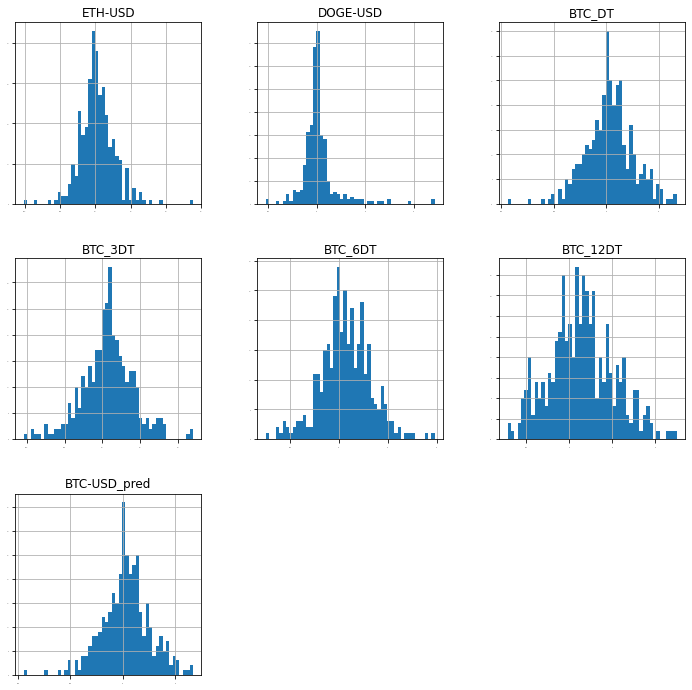

In [200]:
dataset.hist(bins=50, sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12))
pyplot.show()

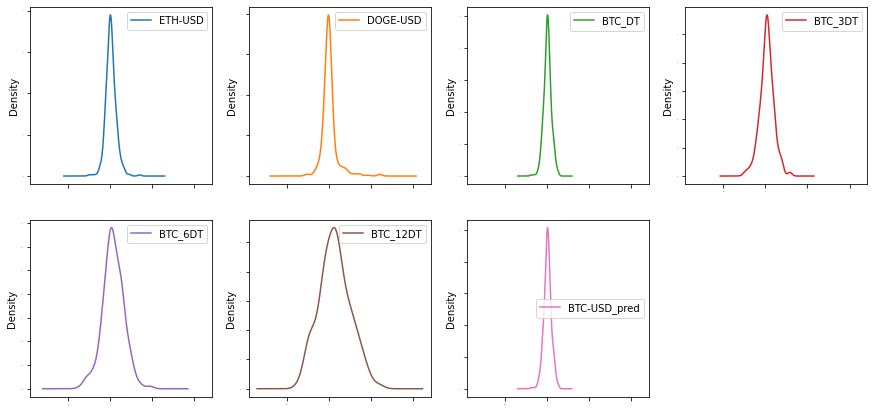

In [201]:
dataset.plot(kind='density', subplots=True, layout=(4,4), sharex=True, legend=True, fontsize=1, figsize=(15,15))
pyplot.show()

<AxesSubplot:title={'center':'Correlation Matrix'}>

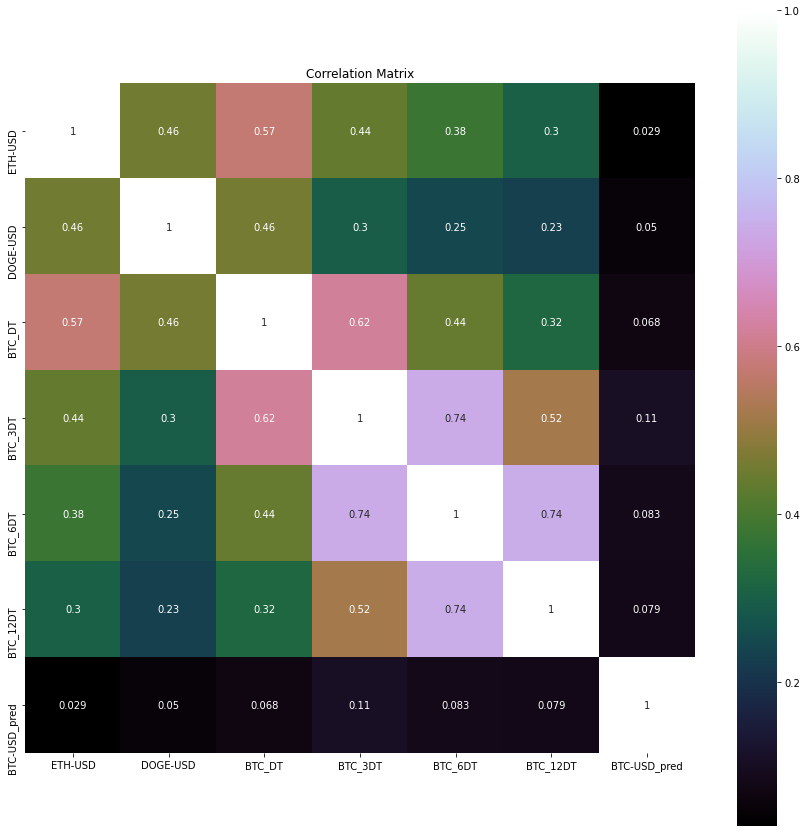

In [202]:
correlation = dataset.corr()
pyplot.figure(figsize=(15,15))
pyplot.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

<Figure size 1080x1080 with 0 Axes>

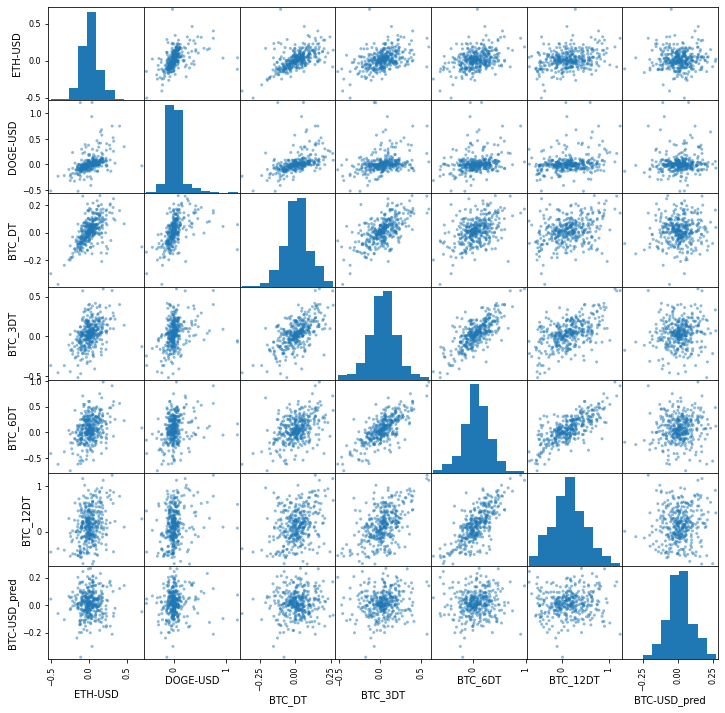

In [203]:
pyplot.figure(figsize=(15,15))
scatter_matrix(dataset,figsize=(12,12))
pyplot.show()

<ipython-input-204-be45bd22875e>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  res = sm.tsa.seasonal_decompose(Y,freq=52)


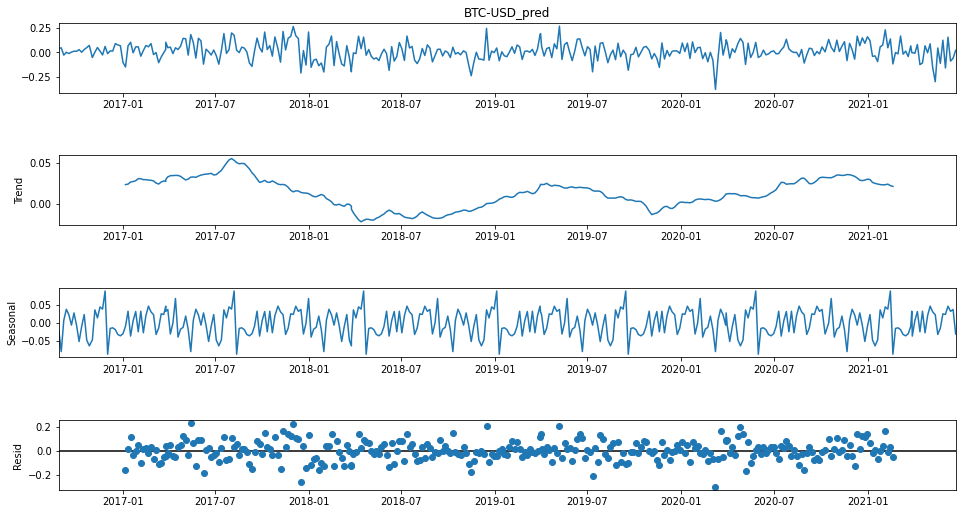

In [204]:
res = sm.tsa.seasonal_decompose(Y,freq=52)
fig = res.plot()
fig.set_figheight(8)
fig.set_figwidth(15)
pyplot.show()

In [205]:
bestfeatures = SelectKBest(k=5, score_func=f_regression)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfscores

,0
0,0.290
1,0.893
2,1.632
3,4.201
4,2.482
5,2.218


In [206]:
dfcolumns = pd.DataFrame(X.columns)
dfcolumns

,0
0,ETH-USD
1,DOGE-USD
2,BTC_DT
3,BTC_3DT
4,BTC_6DT
5,BTC_12DT


In [207]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores

,0,0
0,ETH-USD,0.290
1,DOGE-USD,0.893
2,BTC_DT,1.632
3,BTC_3DT,4.201
4,BTC_6DT,2.482
5,BTC_12DT,2.218


In [208]:
featureScores.columns = ['Specs','Score']
featureScores

,Specs,Score
0,ETH-USD,0.290
1,DOGE-USD,0.893
2,BTC_DT,1.632
3,BTC_3DT,4.201
4,BTC_6DT,2.482
5,BTC_12DT,2.218


In [209]:
featureScores.nlargest(10,'Score').set_index('Specs')

,Score
Specs,
BTC_3DT,4.201
BTC_6DT,2.482
BTC_12DT,2.218
BTC_DT,1.632
DOGE-USD,0.893
ETH-USD,0.290


In [210]:
validation_size = 0.2

train_size = int(len(X) * (1-validation_size))
X_train, X_test = X[0:train_size], X[train_size:len(X)]
Y_train, Y_test = Y[0:train_size], Y[train_size:len(X)]

In [211]:
# Test options and eval metrics
num_folds = 10
seed = 7
# scikit is moving away from mean_squared_error. 
# In order to avoid confusion, and to allow comparison with other models, we invert the final scores
scoring = 'neg_mean_squared_error' 

In [212]:
# Regression and tree regression algos
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

In [213]:
# NN 
models.append(('MLP', MLPRegressor()))

In [214]:
# Ensable Models
# Boosting methods
models.append(('ABR', AdaBoostRegressor()))
models.append(('GBR', GradientBoostingRegressor()))
# Bagging methods
models.append(('RFR', RandomForestRegressor()))
models.append(('ETR', ExtraTreesRegressor()))

In [215]:
# Once we have selected all the models, we loop over each of them. 
# First we run the K-fold analysis. 
# Next we run the model on the entire training and testing dataset.
names = []
kfold_results = []
test_results = []
train_results = []
for name, model in models:
    names.append(name)
    
    ## K Fold analysis:
    
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    #converted mean square error to positive. The lower the beter
    cv_results = -1* cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    kfold_results.append(cv_results)
    

    # Full Training period
    res = model.fit(X_train, Y_train)
    train_result = mean_squared_error(res.predict(X_train), Y_train)
    train_results.append(train_result)
    
    # Test results
    test_result = mean_squared_error(res.predict(X_test), Y_test)
    test_results.append(test_result)
    
    msg = "%s: %f (%f) %f %f" % (name, cv_results.mean(), cv_results.std(), train_result, test_result)
    print(msg)

LR: 0.008362 (0.004163) 0.008057 0.008379
LASSO: 0.008177 (0.004345) 0.008193 0.008260
EN: 0.008177 (0.004345) 0.008193 0.008260
KNN: 0.009524 (0.004638) 0.006193 0.009756
CART: 0.013949 (0.005776) 0.000000 0.016566
SVR: 0.009646 (0.003555) 0.005972 0.009374
MLP: 0.008741 (0.004191) 0.008253 0.008089
ABR: 0.008402 (0.004019) 0.005482 0.010025
GBR: 0.008976 (0.004474) 0.001850 0.011746
RFR: 0.008377 (0.003985) 0.001174 0.009630
ETR: 0.008462 (0.004026) 0.000000 0.010331


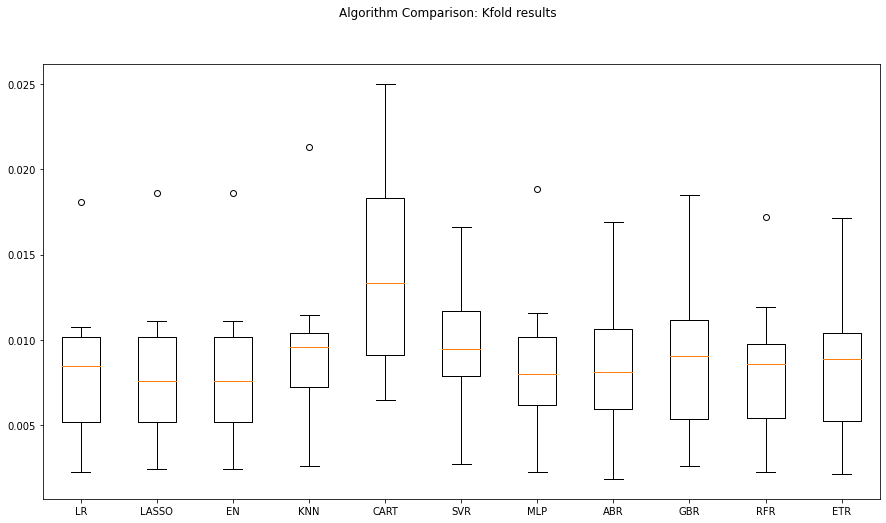

In [216]:
# Look at kfold results
# Linear regression and regularized regression including lasso and en seem to do good
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison: Kfold results')
ax = fig.add_subplot(111)
pyplot.boxplot(kfold_results)
ax.set_xticklabels(names)
fig.set_size_inches(15,8)
pyplot.show()

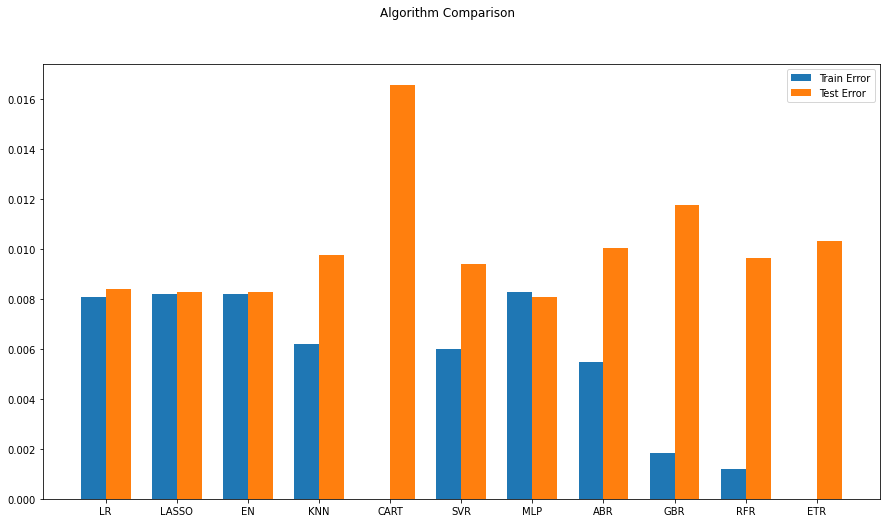

In [217]:
# Training and test error 
# compare algorithms
fig = pyplot.figure()

ind = np.arange(len(names))  # the x locations for the groups
width = 0.35  # the width of the bars

fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.bar(ind - width/2, train_results,  width=width, label='Train Error')
pyplot.bar(ind + width/2, test_results, width=width, label='Test Error')
fig.set_size_inches(15,8)
pyplot.legend()
ax.set_xticks(ind)
ax.set_xticklabels(names)
pyplot.show()

In [218]:
# Time series model - arima model
X_train_ARIMA=X_train.loc[:, ['BTC-USD', 'ETH-USD', 'DOGE-USD']]
X_test_ARIMA=X_test.loc[:, ['BTC-USD', 'ETH-USD', 'DOGE-USD']]
tr_len = len(X_train_ARIMA)
te_len = len(X_test_ARIMA)
to_len = len (X)

KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Index(['BTC-USD'], dtype='object'). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"